In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


## Created By: Anak Digital

1.  Data Understanding
2.  Target Variable
3.  Independent Variable(Categorical)
4.  Numerical Variable
5.  Data Preprocessing
6.  Simple Machine Learning
7.  SMOTE
8.  GridSearchCV
9.  Feature Selection
10. ML + GridsearchCV
10.  SMOTE + GridSearchCV

The telco company churn data contains a lot of information based on 21 column in the dataset, the company provide home phone and internet services. obviously, there will be customer that stay or leave.

Purposes :  
1. We want to figure out the best model to  predict customer telco churn
2. what feature that completely affect the churn.
3. We want to give some of the recomendation to stakeholder.

# Data Understanding

In [2]:
#import library
import pandas as pd
import numpy as np

#visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Dataset mengandung informasi sebagai berikut.
1.	Customer dengan status masih menggunakan atau meninggalkan layanan - column Churn
2.	Servis atau product yang menjadi langganan customer - phone service, multiple lines, internet service, online service, online backup, device protection, tech support, streaming TV, streaming movies
3.	Metode pembayaran yang dipilih oleh customer- Contract (monthly or yearly billing), PaperlessBilling (yes or no), Payment method, monthly charges, total charges
4.	Detail Customer - customerID, gender, seniorCitizen status, have partner or no, have dependent or no, tenure (how long they have signed up for the service)


In [3]:
# Read dataset
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# To see how many columns and rows
print(df.columns)
print(df.shape)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
(7043, 21)


In [6]:
# Data type in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Change total charge data type from 'object' into Float64
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [8]:
# Total charges dtype have changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# After changed dtype, turns out there's 11 null value in the column total charge
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# We fill the null data within mean of total charge
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [11]:
# Describe numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [12]:
# There's no duplicate value
df.duplicated().sum()

0

# Target Variable

In [13]:
# Number of column churn
df['Churn'].count()

7043

In [14]:
#column churn show up categorical 'No' and 'Yes'
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
# data 'No' contains 73% from the dataset
# data 'Yes' contains 26.5% from the dataset
df['Churn'].value_counts(normalize = True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

It means there's imbalance dataset between 'No' and 'Yes'

In [16]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


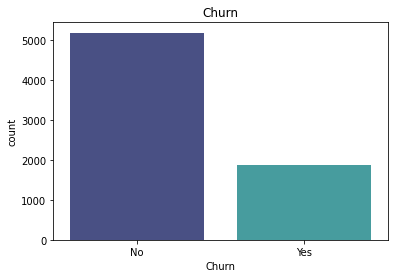

In [17]:
# We visualize with seaborn by using mako palette
sns.countplot(x="Churn", data=df, palette = "mako")
plt.title('Churn')
df.loc[:,'Churn'].value_counts()
plt.savefig('churn.jpg')

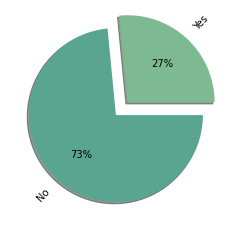

In [18]:
# Pie plot
data_churn = [1869, 5174]
explode = [0.2, 0]

location = ['Yes', 'No']

# Seaborn color palette to plot pie chart
colors = sns.color_palette('crest')

# create pie chart using matplotlib
plt.pie(data_churn, labels=location, colors=colors,
        autopct='%.0f%%', explode=explode, shadow=True, rotatelabels='true')
plt.show()

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64


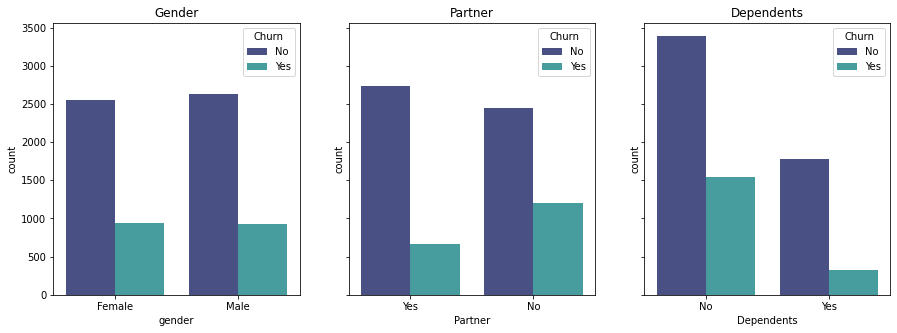

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)


# Gender
sns.countplot(ax=axes[0], x=df['gender'], hue = df['Churn'], palette = "mako")
axes[0].set_title('Gender')
print(df.loc[:,'gender'].value_counts())

# Partner
sns.countplot(ax=axes[1], x=df['Partner'], hue = df['Churn'], palette = "mako")
axes[1].set_title('Partner')
print(df.loc[:,'Partner'].value_counts())


# Partner
sns.countplot(ax=axes[2], x=df['Dependents'], hue = df['Churn'], palette = "mako")
axes[2].set_title('Dependents')
print(df.loc[:,'Dependents'].value_counts())

* So, take a look at the chart on top.. we can see gender that many churn is male 
* the more slightly partner, the more many can be churn 
* Dependents that have 'yes' more slightly churn rather than 'No'

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


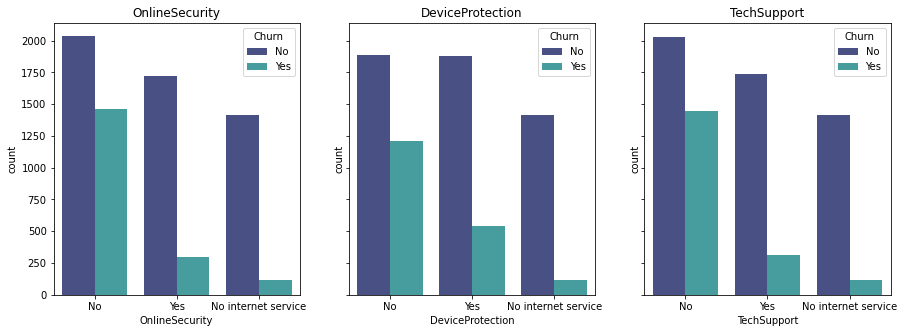

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)


# OnlineSecurity
sns.countplot(ax=axes[0], x=df['OnlineSecurity'], hue = df['Churn'], palette = "mako")
axes[0].set_title('OnlineSecurity')
print(df.loc[:,'OnlineSecurity'].value_counts())

# DeviceProtection
sns.countplot(ax=axes[1], x=df['DeviceProtection'], hue = df['Churn'], palette = "mako")
axes[1].set_title('DeviceProtection')
print(df.loc[:,'DeviceProtection'].value_counts())

# TechSupport
sns.countplot(ax=axes[2], x=df['TechSupport'], hue = df['Churn'], palette = "mako")
axes[2].set_title('TechSupport')
print(df.loc[:,'TechSupport'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


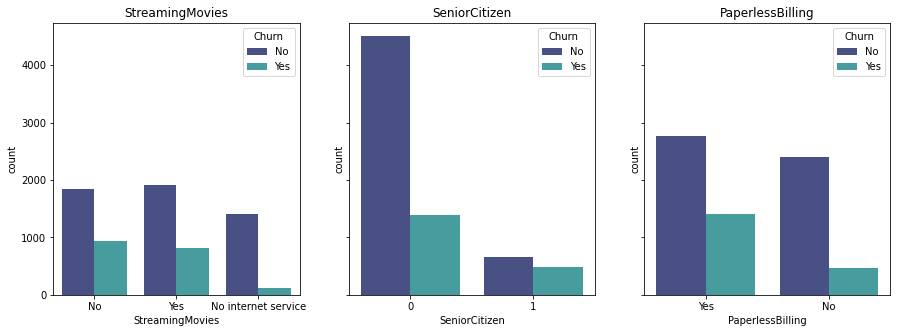

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)


# StreamingMovies
sns.countplot(ax=axes[0], x=df['StreamingMovies'], hue = df['Churn'], palette = "mako")
axes[0].set_title('StreamingMovies')
print(df.loc[:,'StreamingMovies'].value_counts())

# SeniorCitizen
sns.countplot(ax=axes[1], x=df['SeniorCitizen'], hue = df['Churn'], palette = "mako")
axes[1].set_title('SeniorCitizen')
print(df.loc[:,'SeniorCitizen'].value_counts())

# PaperlessBilling
sns.countplot(ax=axes[2], x=df['PaperlessBilling'], hue = df['Churn'], palette = "mako")
axes[2].set_title('PaperlessBilling')
print(df.loc[:,'PaperlessBilling'].value_counts())

Skewness:  0.2395397495619829


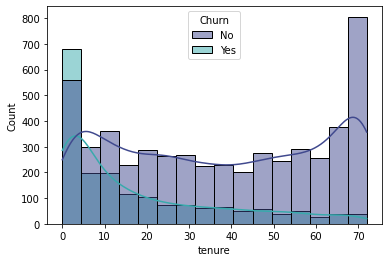

Skewness:  -0.22052443394398033


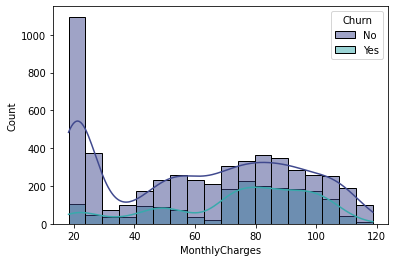

Skewness:  0.9623940229874866


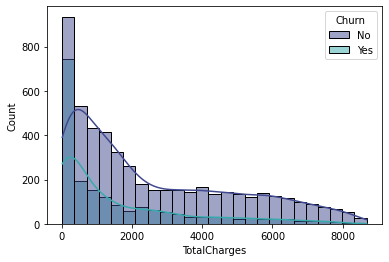

In [22]:
column = ['tenure', 'MonthlyCharges', 'TotalCharges']
a = 0
for y in column:
  sns.histplot(data= df, x= y, hue = df['Churn'], kde=True, palette = "mako")
  axes[a].set_title(y)
  print("Skewness: ", df[y].skew())
  a += 1
  plt.show()

* After we look histplot, we know that at the begining tenure has highly churn it may the customer only do experimentation with our product. but after the begining the curve decrease until the end.
* Monthlycharges have not stable distribution, around 80 - 100 have highest churn
* Total charges seems like 'tenure' at the begining the customer has highly churn, but until the end the skew more decrease

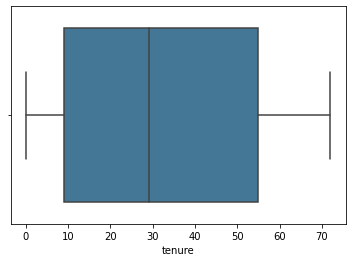

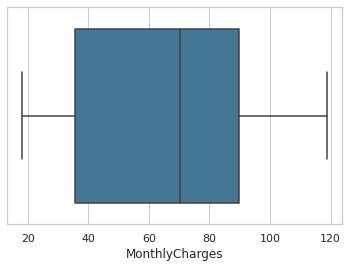

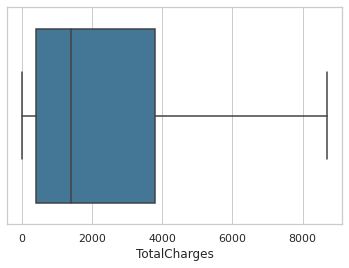

In [23]:
a = df.columns
b = ['tenure','MonthlyCharges','TotalCharges']
for i in b:
  plt.subplots()
  sns.set_theme(style = 'whitegrid')
  sns.boxplot(x = df[i], palette = 'mako')
  plt.show()

* After we are plotting with box plot, there's no data outliers.

In [24]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

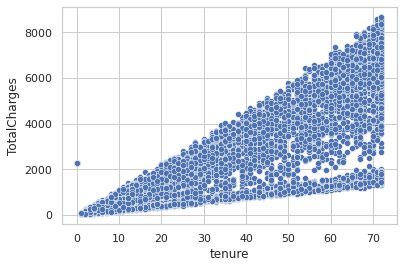

In [25]:
# Tenure vs TotalCharges have positive correlation
sns.scatterplot(x = 'tenure', y = 'TotalCharges', data = df, palette = "crest")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

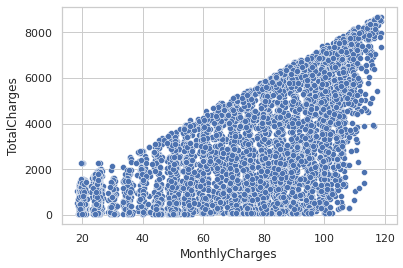

In [26]:
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', data = df, palette = "crest")

In [27]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


# Data Preprocessing

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Mulai Data Preprocessing
df_X = df.drop(['customerID','Churn'], axis =1)

In [29]:
y = pd.DataFrame(df['Churn'].replace(to_replace = 'No', value = 0))
y = pd.DataFrame(y['Churn'].replace(to_replace = 'Yes', value = 1))
y.to_numpy()
print(y)

      Churn
0         0
1         0
2         1
3         0
4         1
...     ...
7038      0
7039      0
7040      0
7041      1
7042      0

[7043 rows x 1 columns]


In [30]:
#Imputation
df_X['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [31]:
# Categorical Encoding
#merubah categorical value menjadi numerical value
#bisa pakai label encoding, ordinal atau one hot encoding
from sklearn.preprocessing import OneHotEncoder

cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
print(cat_features)
#ohe = OneHotEncoder()
le = LabelEncoder()
for i in cat_features:
  #df_X[i] = ohe.fit_transform(df_X[i].to_numpy().reshape(-1,1)).toarray()
  df_X[i] = le.fit_transform(df_X[i])

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [32]:
print(df_X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [33]:
#hold-out method, dibagi menjadi training dan testing set. 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.3, random_state=1)

In [34]:
# Scalling
from sklearn.preprocessing import MinMaxScaler

     
trans = MinMaxScaler().fit(X_train)

X_train_ = trans.transform(X_train)
X_test = trans.transform(X_test)

In [35]:
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import GradientBoostingClassifier

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

After data preprocessing means that the data is ready to proceed to the next step, we want to create a simple machine learning with 8 classifiers

# Simple machine learning model

Confusion matrix  [[1405  180]
 [ 221  307]]
Confusion matrix  [[1370  215]
 [ 235  293]]
Confusion matrix  [[1279  306]
 [ 267  261]]
Confusion matrix  [[1204  381]
 [ 118  410]]
Confusion matrix  [[1422  163]
 [ 248  280]]
Confusion matrix  [[1438  147]
 [ 261  267]]
Confusion matrix  [[1410  175]
 [ 233  295]]
Confusion matrix  [[1403  182]
 [ 228  300]]


,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.80,0.81,0.63,0.58,0.60
1,KNeighborsClassifier,0.79,0.79,0.58,0.55,0.57
2,DecisionTreeClassifier,1.00,0.73,0.46,0.49,0.48
3,GaussianNB,0.75,0.76,0.52,0.78,0.62
4,RandomForestClassifier,1.00,0.81,0.63,0.53,0.58
5,SVC,0.81,0.81,0.64,0.51,0.57
6,GradientBoostingClassifier,0.82,0.81,0.63,0.56,0.59
7,AdaBoostClassifier,0.81,0.81,0.62,0.57,0.59


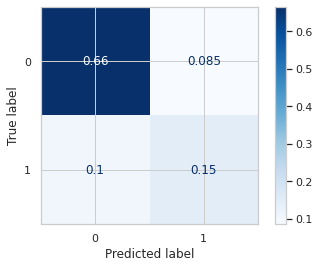

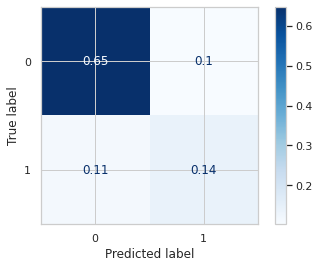

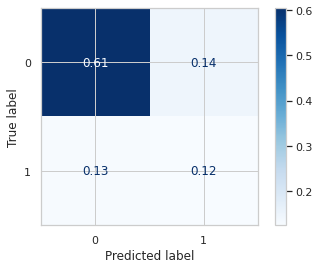

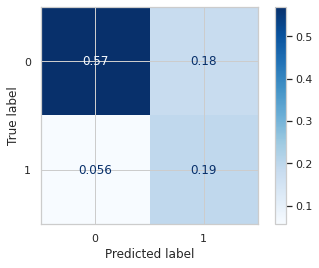

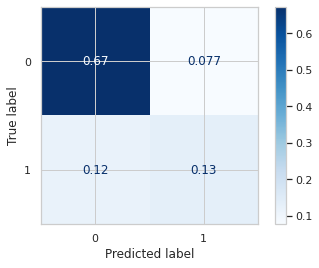

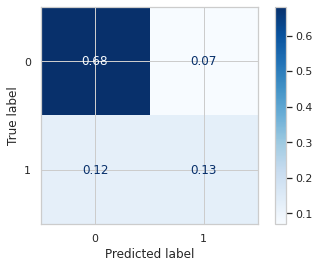

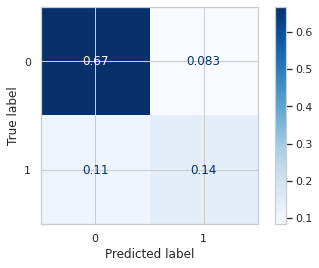

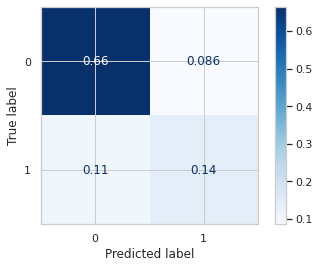

In [36]:
def ml_model(X_train_,X_test, y_train, y_test):
  MLA = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 29),DecisionTreeClassifier(),GaussianNB(), RandomForestClassifier(),
         SVC(decision_function_shape='ovr'), GradientBoostingClassifier(), AdaBoostClassifier()]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(X_train_, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_, y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(y_test, predicted),2)
    print('Confusion matrix ', confusion_matrix(y_test, predicted)) 
    plot_confusion_matrix(alg, X_test, y_test, cmap=plt.cm.Blues, normalize = 'all') 
    row_index+=1
  MLA_compare.sort_index(ascending = True)   
  return MLA_compare  
ml_model(X_train_,X_test, y_train, y_test)

the result of simple machine learning, there's 2 the best modelling logistic regression and adaboostclassifier

# Over-Sampling

we have imbalance dataset therefore, we do over-sampling method to find out the best result for our model.

In [37]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

smote = SMOTE(random_state=42)

sebelum random oversampling
Churn
0        3589
1        1341
dtype: int64
Churn
0        72.799189
1        27.200811
dtype: float64
setelah random oversampling
Churn
0        3589
1        3589
dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

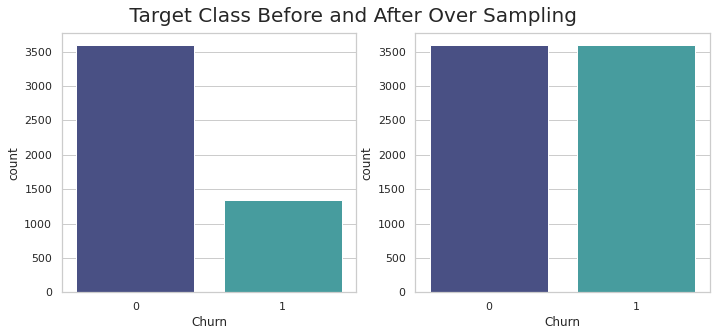

In [38]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train_, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
print('sebelum random oversampling')
print(pd.DataFrame(y_train).value_counts())
print(pd.DataFrame(y_train).value_counts(normalize = True)*100)
print('setelah random oversampling')
print(pd.DataFrame(y_resampled).value_counts())


fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Target Class Before and After Over Sampling', fontsize = 20)
sns.color_palette("Blues", as_cmap=True)

sns.countplot(x = 'Churn', data = y_train, ax=ax1, palette = "mako")

sns.countplot(x = 'Churn', data = y_resampled, ax=ax2, palette = "mako")

Confusion matrix  [[1177  408]
 [  98  430]]
Confusion matrix  [[1007  578]
 [  56  472]]
Confusion matrix  [[1245  340]
 [ 209  319]]
Confusion matrix  [[1152  433]
 [  99  429]]
Confusion matrix  [[1331  254]
 [ 190  338]]
Confusion matrix  [[1220  365]
 [ 138  390]]
Confusion matrix  [[1279  306]
 [ 138  390]]
Confusion matrix  [[1215  370]
 [ 116  412]]


,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.78,0.76,0.51,0.81,0.63
1,KNeighborsClassifier,0.76,0.70,0.45,0.89,0.60
2,DecisionTreeClassifier,1.00,0.74,0.48,0.60,0.54
3,GaussianNB,0.76,0.75,0.50,0.81,0.62
4,RandomForestClassifier,1.00,0.79,0.57,0.64,0.60
5,SVC,0.84,0.76,0.52,0.74,0.61
6,GradientBoostingClassifier,0.85,0.79,0.56,0.74,0.64
7,AdaBoostClassifier,0.82,0.77,0.53,0.78,0.63


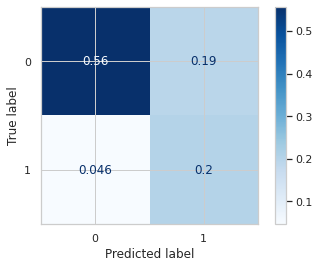

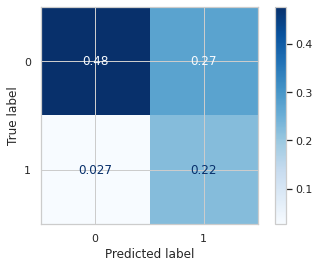

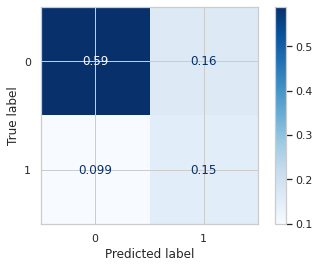

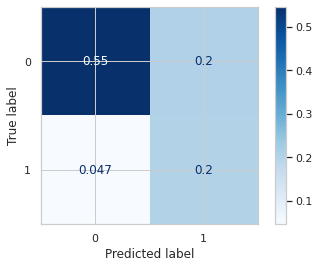

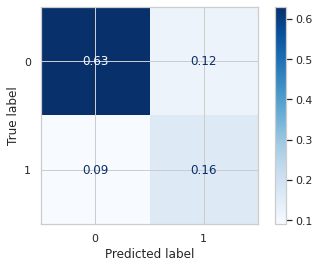

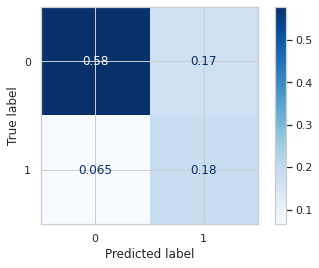

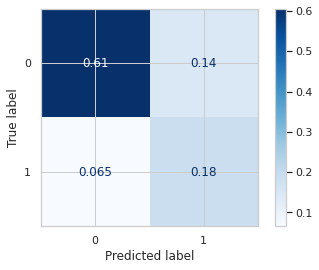

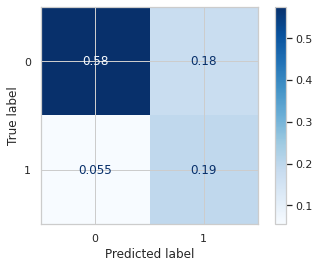

In [39]:
Over_sampling = ml_model(X_resampled, X_test, y_resampled, y_test)
Over_sampling

# GridSearchCV

GridSearchCV is to get the best parameter with input certain parameter. In this method we can see below the best parameter each classifier.

In [40]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [41]:
model_params = {
'random_forest':{
    'model': RandomForestClassifier(),
    'params':{
        'n_estimators':[1,5,10,20,40,60,100,200,300],
        'max_depth':[3,5,7,9,11,13]
}
},
'logistic_regression':{
    'model':LogisticRegression(random_state = 42),
    'params':{'C':[1,5,10],
    'penalty' : ['l1', 'l2']
}
},
    'GradientBoosting':{
    'model':GradientBoostingClassifier(random_state = 42),
    'params':{'n_estimators':[500,750,1000,1250,1500,1750],
      'learning_rate':[0.05,0.01,0.005]
}
},
    'AdaBoostClassifier':{
    'model': AdaBoostClassifier(),
    'params':{'n_estimators':[1,5,10,20,40,60,100,200,300],
    'algorithm': ['SAMME', 'SAMME.R']
}
}
}

In [42]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 3, return_train_score = False)
    clf.fit(X_train_, y_train)
    clf_prediction = clf.predict(X_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})
   


In [43]:
data = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
data

,model,best_score,best_params
0,random_forest,0.800000,"{'max_depth': 7, 'n_estimators': 100}"
1,logistic_regression,0.798987,"{'C': 5, 'penalty': 'l2'}"
2,GradientBoosting,0.797160,"{'learning_rate': 0.005, 'n_estimators': 750}"
3,AdaBoostClassifier,0.802232,"{'algorithm': 'SAMME', 'n_estimators': 300}"


In [44]:
# Find the best parameter Adaboostclassifier
score = []
model_param = {
    'model': AdaBoostClassifier(),
    'params':{
        'n_estimators':[1,5,10,20,40,60,100,200,300],
        'algorithm': ['SAMME', 'SAMME.R']}}
        
clf = GridSearchCV(model_param['model'], model_param['params'], cv = 3, return_train_score = False)
clf.fit(X_train_, y_train)
clf_prediction = clf.predict(X_test)
score.append({
        'model': 'AdaBoostClassifier',
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})

In [45]:
data = pd.DataFrame(score,columns = ['model','best_score','best_params'])
data

,model,best_score,best_params
0,AdaBoostClassifier,0.802232,"{'algorithm': 'SAMME', 'n_estimators': 300}"


In [46]:

dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [47]:
clf.best_score_

0.8022318380862258

In [48]:


clf.best_params_



{'algorithm': 'SAMME', 'n_estimators': 300}

# Feature Selection

## Filter method

Feature selection is the process of reducing the number of input variables when developing a predictive model.

In [49]:
# import library
import pandas as pd
from collections import Counter

# import ML library
from sklearn import svm, preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Pre-process
from imblearn.over_sampling import SMOTE #oversampling
from sklearn.utils import resample #oversampling & #undersampling
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

# import evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# visualisation
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

In [50]:
filter = SelectKBest(f_classif, k= 13)
filter.fit(X_train_, y_train)

X_train_filter = filter.transform(X_train_)
X_test_filter = filter.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_filter.shape)

Before feature selection (4930, 19)
After feature selection (4930, 13)


Score of features [6.20554800e-01 1.12282180e+02 9.94953886e+01 1.14590516e+02
 6.78283600e+02 1.67803843e+00 8.96278868e+00 1.20592418e+01
 4.33813598e+02 1.88828376e+02 1.59749338e+02 4.09222757e+02
 7.91369289e+00 5.21332890e+00 8.98443892e+02 1.65266998e+02
 5.12096671e+01 1.94743699e+02 1.89998556e+02]


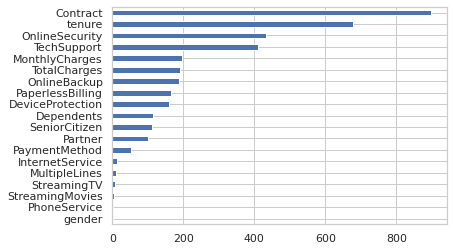

In [51]:
print("Score of features", filter.scores_)

feature_importance = pd.Series(filter.scores_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

In [52]:

MLA = [LogisticRegression(C = 5, penalty = 'l2'),KNeighborsClassifier(n_neighbors = 40, leaf_size = 1), RandomForestClassifier(n_estimators = 40, max_depth = 7),
        GradientBoostingClassifier(learning_rate = 0.005, n_estimators = 750), AdaBoostClassifier(algorithm = 'SAMME', n_estimators = 300)]
for i in MLA:
  clf = i
  clf.fit(X_train_filter, y_train)

  # Evaluation
  y_predict_train = clf.predict(X_train_filter)
  y_predict_test = clf.predict(X_test_filter)

  training_acc = accuracy_score(y_train, y_predict_train)
  testing_acc = accuracy_score(y_test, y_predict_test)
  precision_acc = precision_score(y_test, y_predict_test)
  recall_acc = recall_score(y_test, y_predict_test)
  f1score_acc = f1_score(y_test, y_predict_test)
  

  print("{}".format(i))
  print("Training Accuracy: {}".format(training_acc))
  print("Testing Accuracy: {}".format(testing_acc))
  print("precision : {}".format(precision_acc))
  print("recall : {}".format(recall_acc))
  print("f1score_acc :".format(f1score_acc))


LogisticRegression(C=5)
Training Accuracy: 0.798580121703854
Testing Accuracy: 0.8069096071935636
precision : 0.6214574898785425
recall : 0.5814393939393939
f1score_acc :
KNeighborsClassifier(leaf_size=1, n_neighbors=40)
Training Accuracy: 0.7878296146044624
Testing Accuracy: 0.7950780880265026
precision : 0.5987525987525988
recall : 0.5454545454545454
f1score_acc :
RandomForestClassifier(max_depth=7, n_estimators=40)
Training Accuracy: 0.8196754563894524
Testing Accuracy: 0.8121154756270705
precision : 0.6585956416464891
recall : 0.5151515151515151
f1score_acc :
GradientBoostingClassifier(learning_rate=0.005, n_estimators=750)
Training Accuracy: 0.8101419878296146
Testing Accuracy: 0.8121154756270705
precision : 0.6555819477434679
recall : 0.5227272727272727
f1score_acc :
AdaBoostClassifier(algorithm='SAMME', n_estimators=300)
Training Accuracy: 0.8046653144016227
Testing Accuracy: 0.8092759110269758
precision : 0.6299376299376299
recall : 0.5738636363636364
f1score_acc :


# Wrapper method (RFE)

In [53]:
from sklearn.feature_selection import RFE

LogisticRegression(C=5)
Before feature selection (4930, 19)
After feature selection (4930, 5)
Score of features [15  6 13 12  1  1  9  4  3  7  8  2 14 11  1  5 10  1  1]


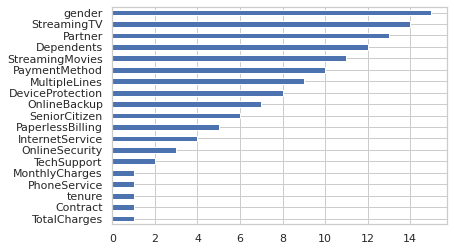

In [54]:
# wrapper logistic
clf = LogisticRegression(C = 5,penalty = 'l2')
wrapper = RFE(clf, n_features_to_select=5)
wrapper.fit(X_train_, y_train)

X_train_wrapper = wrapper.transform(X_train_)
X_test_wrapper = wrapper.transform(X_test)
    
print("{}".format(clf))
print("Before feature selection", X_train_.shape)
print("After feature selection", X_train_wrapper.shape)


print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

In [55]:
clf = LogisticRegression(C = 5, penalty = 'l2')
clf.fit(X_train_wrapper, y_train)

# Evaluation
y_predict_train = clf.predict(X_train_wrapper)
y_predict_ = clf.predict(X_test_wrapper)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_)
precision = precision_score(y_test, y_predict_)
recall = recall_score(y_test, y_predict_)
f1score = f1_score(y_test, y_predict_)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))
print("precision : {}".format(precision))
print("recall : {}".format(recall))
print("f1score :".format(f1score))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.7880324543610547
Testing Accuracy: 0.8054898248935163
precision : 0.6280087527352297
recall : 0.5435606060606061
f1score :
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



LogisticRegression(C=5)
Before feature selection (4930, 19)
After feature selection (4930, 10)
Score of features [10  1  8  7  1  1  4  1  1  2  3  1  9  6  1  1  5  1  1]


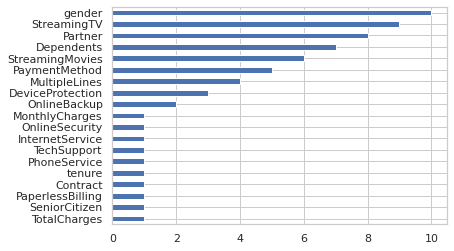

In [56]:
# wrapper gradien boosting
clf_ = LogisticRegression(C = 5, penalty = 'l2')
wrapper = RFE(clf_, n_features_to_select=10)
wrapper.fit(X_train_, y_train)

X_train_wrapper = wrapper.transform(X_train_)
X_test_wrapper = wrapper.transform(X_test)
    
print("{}".format(clf_))
print("Before feature selection", X_train_.shape)
print("After feature selection", X_train_wrapper.shape)


print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()
    

GradientBoostingClassifier(learning_rate=0.005, n_estimators=750)
Before feature selection (4930, 19)
After feature selection (4930, 10)
Score of features [ 6  2  8 10  1  9  3  1  1  1  5  1  7  4  1  1  1  1  1]


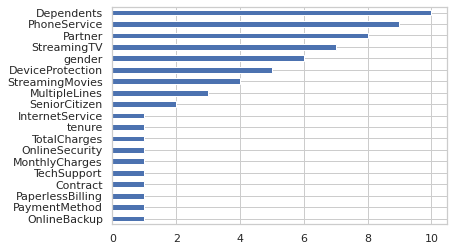

In [57]:
# wrapper gradien boosting
clf_ = GradientBoostingClassifier(learning_rate = 0.005, n_estimators = 750)
wrapper = RFE(clf_, n_features_to_select=10)
wrapper.fit(X_train_, y_train)

X_train_wrapper = wrapper.transform(X_train_)
X_test_wrapper = wrapper.transform(X_test)
    
print("{}".format(clf_))
print("Before feature selection", X_train_.shape)
print("After feature selection", X_train_wrapper.shape)


print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()
    

In [58]:
clf_ = GradientBoostingClassifier(learning_rate = 0.005, n_estimators = 1000)
clf_.fit(X_train_wrapper, y_train)

# Evaluation
y_predict_train = clf_.predict(X_train_wrapper)
y_predict_ = clf_.predict(X_test_wrapper)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_)
precision = precision_score(y_test, y_predict_)
recall = recall_score(y_test, y_predict_)
f1score = f1_score(y_test, y_predict_)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))
print("precision : {}".format(precision))
print("recall : {}".format(recall))
print("f1score :".format(f1score))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8093306288032455
Testing Accuracy: 0.8121154756270705
precision : 0.6498855835240275
recall : 0.5378787878787878
f1score :
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



RandomForestClassifier(max_depth=9, n_estimators=60)
Before feature selection (4930, 19)
After feature selection (4930, 10)
Score of features [ 6  4  9  7  1 10  1  1  1  3  1  1  8  5  1  2  1  1  1]


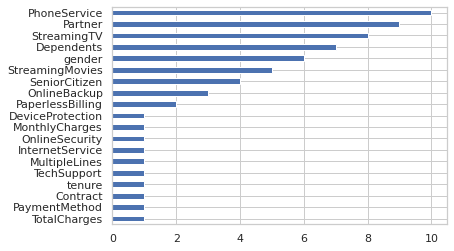

In [59]:
# wrapper randomforest
clf_kn = RandomForestClassifier(n_estimators = 60, max_depth = 9)
wrapper = RFE(clf_kn, n_features_to_select=10)
wrapper.fit(X_train_, y_train)

X_train_wrapper = wrapper.transform(X_train_)
X_test_wrapper = wrapper.transform(X_test)
    
print("{}".format(clf_kn))
print("Before feature selection", X_train_.shape)
print("After feature selection", X_train_wrapper.shape)


print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()
    

In [60]:
clf_ = RandomForestClassifier(n_estimators = 60, max_depth = 9)
clf_.fit(X_train_wrapper, y_train)

# Evaluation
y_predict_train = clf_.predict(X_train_wrapper)
y_predict_ = clf_.predict(X_test_wrapper)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_)
precision = precision_score(y_test, y_predict_)
recall = recall_score(y_test, y_predict_)
f1score = f1_score(y_test, y_predict_)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))
print("precision : {}".format(precision))
print("recall : {}".format(recall))
print("f1score :".format(f1score))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8574036511156187
Testing Accuracy: 0.8045433033601515
precision : 0.6175869120654397
recall : 0.571969696969697
f1score :
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



AdaBoostClassifier(algorithm='SAMME', n_estimators=300)
Before feature selection (4930, 19)
After feature selection (4930, 10)
Score of features [10  2  9  8  1  7  1  6  1  4  3  1  5  1  1  1  1  1  1]


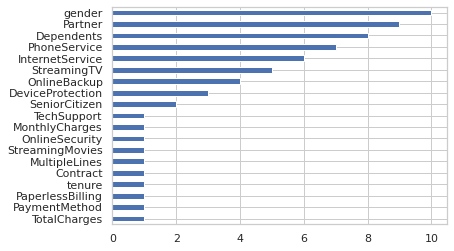

In [61]:
# wrapper adaboost
clf_kn = AdaBoostClassifier(algorithm = 'SAMME', n_estimators = 300)
wrapper = RFE(clf_kn, n_features_to_select=10)
wrapper.fit(X_train_, y_train)

X_train_wrapper = wrapper.transform(X_train_)
X_test_wrapper = wrapper.transform(X_test)
    
print("{}".format(clf_kn))
print("Before feature selection", X_train_.shape)
print("After feature selection", X_train_wrapper.shape)


print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()
    

In [62]:
clf_ = AdaBoostClassifier(algorithm = 'SAMME', n_estimators = 300)
clf_.fit(X_train_wrapper, y_train)

# Evaluation
y_predict_train = clf_.predict(X_train_wrapper)
y_predict_ = clf_.predict(X_test_wrapper)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_)
precision = precision_score(y_test, y_predict_)
recall = recall_score(y_test, y_predict_)
f1score = f1_score(y_test, y_predict_)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))
print("precision : {}".format(precision))
print("recall : {}".format(recall))
print("f1score :".format(f1score))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.7991886409736308
Testing Accuracy: 0.8102224325603408
precision : 0.6336842105263157
recall : 0.5700757575757576
f1score :
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



# ML + GridsearchCV

Confusion matrix  [[1401  184]
 [ 221  307]]
Confusion matrix  [[1396  189]
 [ 254  274]]
Confusion matrix  [[1436  149]
 [ 258  270]]
Confusion matrix  [[1439  146]
 [ 256  272]]
Confusion matrix  [[1414  171]
 [ 227  301]]


,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.80,0.81,0.63,0.58,0.60
1,KNeighborsClassifier,0.79,0.79,0.59,0.52,0.55
2,RandomForestClassifier,0.83,0.81,0.64,0.51,0.57
3,GradientBoostingClassifier,0.81,0.81,0.65,0.52,0.58
4,AdaBoostClassifier,0.80,0.81,0.64,0.57,0.60


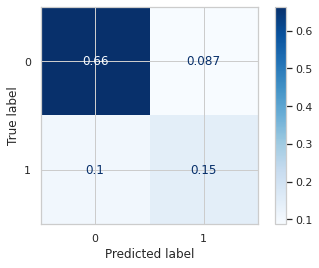

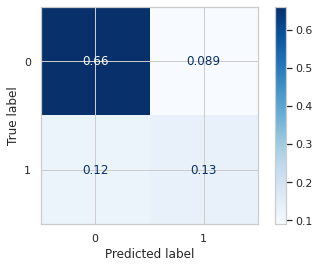

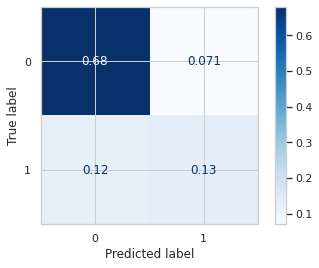

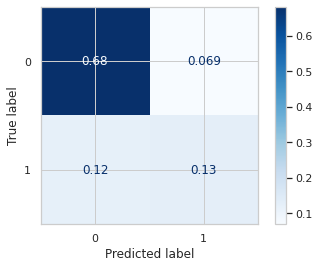

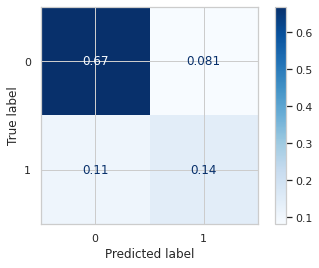

In [63]:
def ml_model_grid(X_train_,X_test, y_train, y_test):
  MLA = [LogisticRegression(C = 5, penalty = 'l2'),KNeighborsClassifier(n_neighbors = 40, leaf_size = 1), RandomForestClassifier(n_estimators = 40, max_depth = 7),
        GradientBoostingClassifier(learning_rate = 0.005, n_estimators = 750), AdaBoostClassifier(algorithm = 'SAMME', n_estimators = 300)]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(X_train_, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_, y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(y_test, predicted),2)
    print('Confusion matrix ', confusion_matrix(y_test, predicted)) 
    plot_confusion_matrix(alg, X_test, y_test, cmap=plt.cm.Blues, normalize = 'all') 
    row_index+=1
  MLA_compare.sort_index(ascending = True)   
  return MLA_compare  
ml_model_grid(X_train_,X_test, y_train, y_test)

# Smote + GridsearchCV

Confusion matrix  [[1177  408]
 [ 101  427]]
Confusion matrix  [[1031  554]
 [  68  460]]
Confusion matrix  [[1223  362]
 [ 116  412]]
Confusion matrix  [[1215  370]
 [ 112  416]]
Confusion matrix  [[1245  340]
 [ 121  407]]


,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.78,0.76,0.51,0.81,0.63
1,KNeighborsClassifier,0.76,0.71,0.45,0.87,0.60
2,RandomForestClassifier,0.84,0.77,0.53,0.78,0.63
3,GradientBoostingClassifier,0.82,0.77,0.53,0.79,0.63
4,AdaBoostClassifier,0.83,0.78,0.54,0.77,0.64


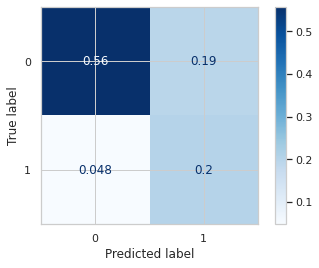

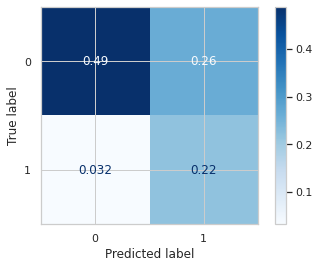

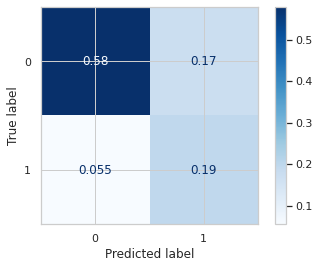

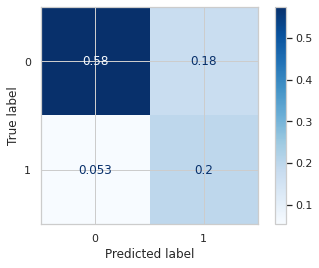

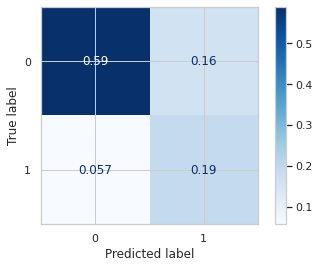

In [64]:
smote = ml_model_grid(X_resampled, X_test, y_resampled, y_test)
smote

we've already made modelling by using ML, ML + gridsearchcv, SMOTE, Filter selection and SMOTE + ML. we decided to use ML + gridsearchcv method with logistic regression classifier because after comparing all of method, logistic regression the best classifier + best parameter.

we suggest that:
1. we have to make several bundle with 'tenure' feature, we may able to make bundle with longer tenure
2. we have to focus votting 'No' on Seniorcitizen because so many votting on 'yes' that is churn. it is possible because because, not thinking too much about our services, we should focus on offering it to younger ages.